# Análisis de los 25 retailers más grandes de Estados Unidos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/work/largest_us_retailers.csv")

## I. Preguntas del negocio

### 1. ¿Cuál es el promedio de ventas sin contar a la compañía dominante?

In [ ]:
df_sorted = df.sort_values('Sales', ascending=0)
mean_sales = round(df_sorted["Sales"][1:].mean(),0)
mean_sales

46602.0

El promedio de ventas sin considerar a la compañía dominante es de **$46,602**.

### 2. ¿Cuánto dinero en ventas generó la mayoría de las compañías?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales'>

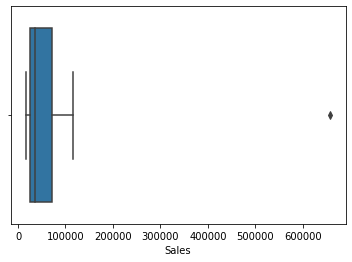

In [ ]:
sns.boxplot(df["Sales"])

Como podemos ver hay un dato que se sale de nuestra gráfica de cajas, por lo tanto este dato lo podemos omitir, al ser un dato muy alejado de los demás.

Como sabemos estas son las ventas de **Wallmart US** que están muy por arriba del resto de las compañías.

Volvemos hacer el análisis sin los datos de Wallamrt US

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sales'>

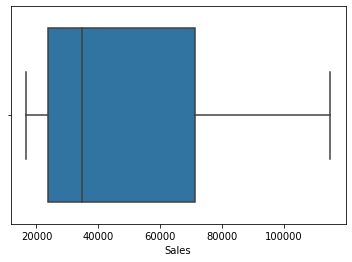

In [ ]:
sns.boxplot(df[1:]["Sales"])

In [ ]:
Q1 = df[1:]["Sales"].quantile(q=0.25)
Q3 = df[1:]["Sales"].quantile(q=0.75)
print(Q1, " - ", Q3)

23860.0  -  71327.75


Viendo la gráfica de caja y el rango intercuartil, también podemos definir que las mayorías de las compañías tienen ventas entre los **23,860 y los 71,327.75** millones de dolares.

Vamos a ver en rangos más pequeños de ventas, donde se agrupa la mayor cantidad de compañías.

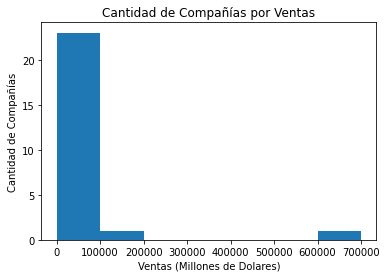

In [ ]:
bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000]
plt.hist(df['Sales'], bins)
plt.xlabel('Ventas (Millones de Dolares)')
plt.ylabel('Cantidad de Compañías')
plt.title('Cantidad de Compañías por Ventas')

plt.show()

La mayor cantidad de compañías tienen menos de **$100,000** millones en ventas.
Vamos a desglosar este grupo para determinar mejor cual es el rango de ventas en el que encaja la mayoría de las compañías. 

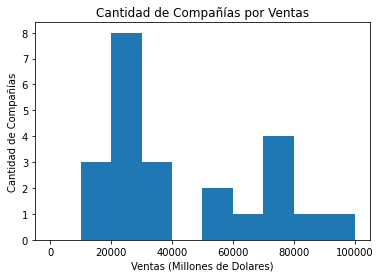

In [ ]:
bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
plt.hist(df['Sales'], bins)
plt.xlabel('Ventas (Millones de Dolares)')
plt.ylabel('Cantidad de Compañías')
plt.title('Cantidad de Compañías por Ventas')

plt.show()

La mayor cantidad de compañías generaron entre **20,000** y **30,000** millones de dolares en ventas 

### 3. ¿Cuántas tiendas tiene la mayoría de las compañías?

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Stores'>

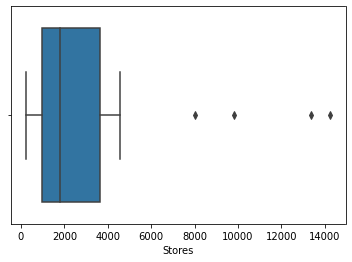

In [ ]:
sns.boxplot(df[1:]["Stores"])

In [ ]:
Q1 = df[1:]["Stores"].quantile(q=0.25)
Q3 = df[1:]["Stores"].quantile(q=0.75)
print(Q1, " - ", Q3)

959.0  -  3640.75


La mayoría de las compañías tienen entre 959 y 3640 tiendas.

Además que existen 4 compañías que tienen muchas tiendas que se salen de los valores típicos

Veamos más a detalle en que rango de tiendas se agrupa la mayor cantidad de compañías

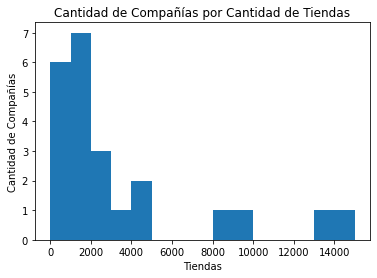

In [ ]:
bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]
plt.hist(df['Stores'], bins)
plt.xlabel('Tiendas')
plt.ylabel('Cantidad de Compañías')
plt.title('Cantidad de Compañías por Cantidad de Tiendas')

plt.show()

La mayoría de las compañías tienen entre **1,000** y **2,000** tiendas

### 4. ¿La cantidad de tiendas está relacionada con la cantidad de ventas? Es decir, ¿si una empresa tiene más tiendas tendrá más dinero de ventas?

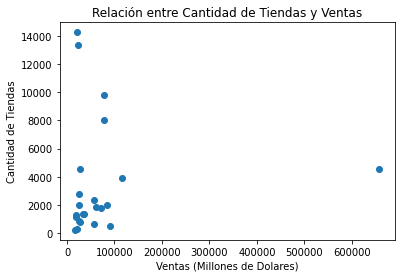

In [ ]:
y = df['Stores']
x = df['Sales']

plt.scatter(x, y)
plt.xlabel('Ventas (Millones de Dolares)')
plt.ylabel('Cantidad de Tiendas')
plt.title('Relación entre Cantidad de Tiendas y Ventas')

plt.show()

No existe una relación entre la cantidad de tiendas y las ventas. Por lo tanto no podemos determinar que al tener nuestra empresa más tiendas, tendrá una mayor cantidad de ventas.

### 5. ¿Cuál es el rango que existe entre las ventas?

In [ ]:
rango = df["Sales"].max() - df["Sales"].min()
rango

641527

El rango entre las ventas es del **$641,527** millones de dolares.

Este rango muy amplio considerando que el promedio de ventas sin la compañia con mayores ventas es tan solo de **$46,602**.

### 6. ¿Cuáles son las 5 empresas que más tiendas físicas tienen? ¿Cuáles de ellas están dentro de las 5 empresas que más ventas tuvieron?

In [ ]:
df_sorted_stores = df.sort_values('Stores', ascending=0)
df_sorted_stores_top5 = df_sorted_stores[:5]
df_sorted_stores_top5

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
20,Dollar Tree,21464,14250.0,1.563919,0.079627,Dollar Stores
19,Dollar General,22234,13350.0,1.768885,0.132412,Dollar Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


Las 5 compañías con más tiendas son **Dollar Tree (14,250 tiendas), Dollar General (13,350 tiendas), CVS incl. Target (9,813 tiendas), Walgreen Boots (8,002 tiendas) y Walmart US (4,574 tiendas)**

In [ ]:
df_sorted_stores_top5.merge(df_sorted[:5], how='inner')

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
1,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters


Las compañías que se repiten en el Top5 de ventas y el Top 5 de tiendas físicas son **Walgreen Boots y Walmart US**

## II. Preguntas opcionales

### 7. ¿Qué categoría de compañía generó más ventas?

In [ ]:
sales_category = df.groupby('Category')['Sales'].sum()
sales_category = sales_category.sort_values(ascending=False)
sales_category

Category
Supercenters             745919
Grocery                  297164
Drug Stores              184202
Home Improvement         144287
Warehouse Club            90048
Electronic/Mail Order     71687
Warehouse Clubs           56828
Department Stores         45088
Dollar Stores             43698
Electronics               34980
Apparel                   25012
Name: Sales, dtype: int64

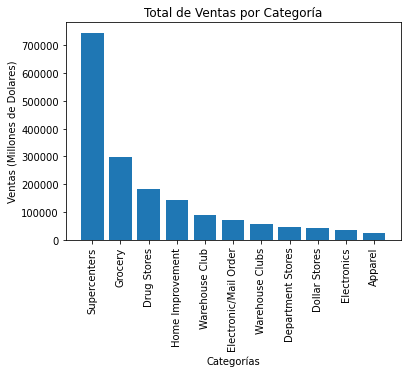

In [ ]:
sales_category = df_sorted.groupby('Category').sum()
sales_category["Percentage"] = (sales_category["Sales"]/sales_category["Sales"].sum())*100
#sales_category = sales_category.rename_axis('Category').reset_index()
sales_category = sales_category.sort_values("Percentage", ascending=False)
sales_category = sales_category.rename_axis('Category').reset_index()
plt.bar(sales_category["Category"], sales_category["Sales"])
plt.xlabel('Categorías')
plt.ylabel('Ventas (Millones de Dolares)')
plt.title('Total de Ventas por Categoría')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
percentage_category = round(sales_category.Sales[0]/sales_category.Sales.sum()*100,2)
percentage_category

42.9

La categría que más vendió fue **Supercenters** con un **42.9%** del total de las ventas.

Al conocer que Wallmart US tiene una diferencia en ventas tan grande con el resto de las compañías,hagamos nuevamente el análisis sin considerar a Wallmart US

In [ ]:
sales_category_no_wallmart = df_sorted[1:].groupby('Category')['Sales'].sum()
sales_category_no_wallmart = sales_category_no_wallmart.sort_values(ascending=False)
sales_category_no_wallmart

Category
Grocery                  297164
Drug Stores              184202
Home Improvement         144287
Warehouse Club            90048
Supercenters              87800
Electronic/Mail Order     71687
Warehouse Clubs           56828
Department Stores         45088
Dollar Stores             43698
Electronics               34980
Apparel                   25012
Name: Sales, dtype: int64

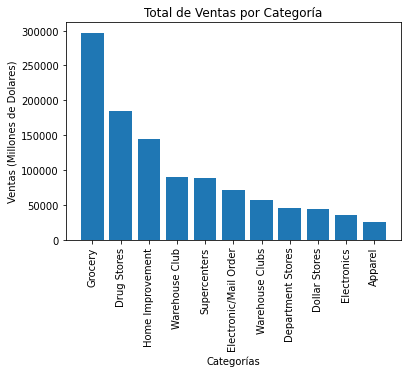

In [ ]:
sales_category_no_wallmart = df_sorted[1:].groupby('Category').sum()
sales_category_no_wallmart["Percentage"] = (sales_category_no_wallmart["Sales"]/sales_category_no_wallmart["Sales"].sum())*100
sales_category_no_wallmart = sales_category_no_wallmart.sort_values("Percentage", ascending=False)
sales_category_no_wallmart = sales_category_no_wallmart.rename_axis('Category').reset_index()
plt.bar(sales_category_no_wallmart["Category"], sales_category_no_wallmart["Sales"])
plt.xlabel('Categorías')
plt.ylabel('Ventas (Millones de Dolares)')
plt.title('Total de Ventas por Categoría')
plt.xticks(rotation='vertical')
plt.show()

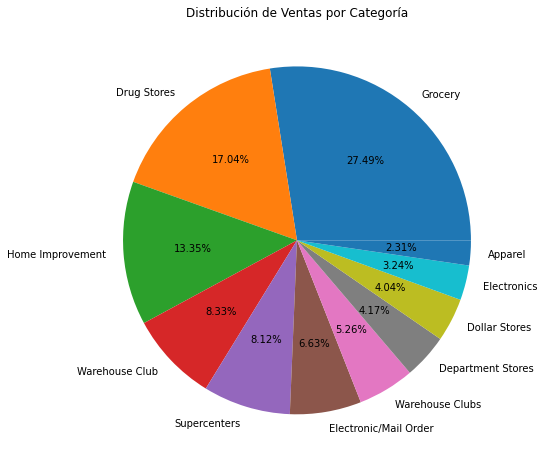

In [ ]:
fig, ax1 = plt.subplots(figsize = (16,8))
ax1.pie(sales_category_no_wallmart["Percentage"], labels = sales_category_no_wallmart["Category"], autopct="%.2f%%")
plt.title('Distribución de Ventas por Categoría')
plt.show()

Si eliminamos a Walmart US, la categoría con mayor ventas fue **Grocery**, con un **27.49%** del total de las ventas.

### 8. ¿Cuál es la compañía que en relación con su cantidad de tiendas físicas genera más ventas?

In [ ]:
df["Average Sales / Total Stores"]=round(df.Sales / df.Stores, 2)
df_average_sales_stores = df.sort_values("Average Sales / Total Stores", ascending=False)
df_average_sales_stores[['Company', 'Sales', 'Stores', 'Average Sales / Total Stores']].head(5)

,Company,Sales,Stores,Average Sales / Total Stores
2,Costco,90048,495.0,181.92
0,Walmart US,658119,4574.0,143.88
10,Sam's Club,56828,655.0,86.76
24,Meijer,16592,231.0,71.83
21,HEB,21384,323.0,66.20


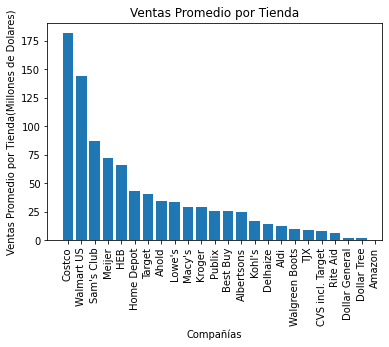

In [ ]:
plt.bar(df_average_sales_stores["Company"], df_average_sales_stores["Average Sales / Total Stores"])
plt.xlabel('Compañías')
plt.ylabel('Ventas Promedio por Tienda(Millones de Dolares)')
plt.title('Ventas Promedio por Tienda')
plt.xticks(rotation='vertical')
plt.show()

La compañía que genera más ventas con relación a la cantidad de tiendas físicas es **Costco** la cual vende en promedio **$181.92 millones de dolares** por cada tienda física. Esto considerando el total de ventas, ya sean ventas en tiendas u online

### 9. ¿Cuáles compañías venden de forma exclusivamente online? ¿Sus ventas destacan sobre las que también tienen tiendas físicas?

In [ ]:
df_online_only = df_sorted[df_sorted["Stores"].isnull()]
df_online_only[["Company", "Sales"]]

,Company,Sales
6,Amazon,71687
11,Apple incl. Online,37664


Las compañías que venden exclusivamente online son **Amazon** y **Apple incl. Online**

In [ ]:
df_sorted.head(10)[["Company", "Sales"]]

,Company,Sales
0,Walmart US,658119
1,Kroger,115037
2,Costco,90048
3,Home Depot,83976
4,Walgreen Boots,78924
5,CVS incl. Target,77792
6,Amazon,71687
7,Target,71208
8,Lowe's,60311
9,Albertsons,56829


En el Top 10 de empresas solo aparece **Amazon**, la cual se encuentra en la posición **#7**.
Mientras que **Apple incl. Online** aparece en la posición **#12**.

Por lo tanto **NO** se puede decir que destaquen sobre las empresas que también venden a través de tiendas físicas.

## III. Tus propias preguntas

### 10. Pregunta

### ¿Existe una relación entre las ventas promedio por tienda y la cantidad de tiendas?

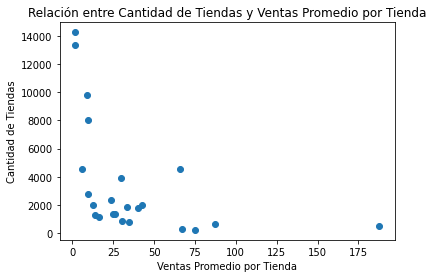

In [ ]:
y = df['Stores']
x = df['Sales/Avg. Store']

plt.scatter(x, y)
plt.xlabel('Ventas Promedio por Tienda')
plt.ylabel('Cantidad de Tiendas')
plt.title('Relación entre Cantidad de Tiendas y Ventas Promedio por Tienda')

plt.show()

**NO** se puede determinar que haya una relación entre la cantidad de tiendas y las ventas promedio por tiendas

### 11. Pregunta

### ¿Cuáles son las Compañías líderes en el Top 3 de las Categorías?, considerando a todas las empresas.

In [ ]:
df_category_1 = df[df.Category == sales_category.Category[0]]
df_category_1 = df_category_1.reset_index()
print(df_category_1.Company[0], " - ", df_category_1.Category[0])

Walmart US  -  Supercenters


In [ ]:
df_category_2 = df[df.Category == sales_category.Category[1]]
df_category_2 = df_category_2.reset_index()
print(df_category_2.Company[0], " - ", df_category_2.Category[0])


Kroger  -  Grocery


In [ ]:
df_category_3 = df[df.Category == sales_category.Category[2]]
df_category_3 = df_category_3.reset_index()
print(df_category_3.Company[0], " - ", df_category_3.Category[0])


Walgreen Boots  -  Drug Stores


Las compañías líderes en las 3 principales categorías son:
1. Wallmar US - Supercenters
2. Kroger  -  Grocery
3. Walgreen Boots  -  Drug Stores

### 12. Pregunta

### ¿Cuántas compañías hay por cada categoría y cuáles son las ventas promedio por Categoría?

In [ ]:
category_sales = df.groupby("Category").sum()
category_sales = category_sales["Sales"].reset_index(name='Sales')
category_count = df.groupby("Category").size().reset_index(name='Count')

In [ ]:
result = pd.merge(category_count, category_sales, on="Category")
result["Average Sales"] = round(result["Sales"]/result["Count"],0)
result = result.sort_values("Average Sales", ascending=False)
result[["Category", "Average Sales", "Count"]]

,Category,Average Sales,Count
8,Supercenters,248640.0,3
9,Warehouse Club,90048.0,1
7,Home Improvement,72144.0,2
4,Electronic/Mail Order,71687.0,1
3,Drug Stores,61401.0,3
10,Warehouse Clubs,56828.0,1
6,Grocery,42452.0,7
5,Electronics,34980.0,1
0,Apparel,25012.0,1
1,Department Stores,22544.0,2


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


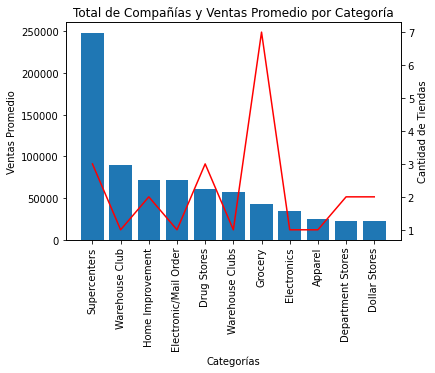

In [ ]:
fig, ax1 = plt.subplots()

ax1.bar(result["Category"], result["Average Sales"])
ax1.set_xlabel("Categorías")
ax1.set_ylabel("Ventas Promedio")
ax1.set_xticklabels(result["Category"],rotation=90)

ax2 = ax1.twinx() 
ax2.set_ylabel("Cantidad de Tiendas")
ax2.plot(result["Category"], result["Count"], color="red")

plt.title('Total de Compañías y Ventas Promedio por Categoría')
plt.show()

Podemos observar que la categoría de **Supercenters** predomina considerablemente sobre las demás. Esto se debe a que en este grupo se encuentra Wallmart US, lo que nos distorsiona un poco el análisis al ser un valor muy alejado de los demás.

Es por esto que vamos a volver a hacer el análisis sin considerar a **Wallmart US**

In [ ]:
category_sales_no_wallmart = df[1:].groupby("Category").sum()
category_sales_no_wallmart = category_sales_no_wallmart["Sales"].reset_index(name='Sales')
category_count_no_wallmart = df[1:].groupby("Category").size().reset_index(name='Count')

In [ ]:
result_no_wallmart = pd.merge(category_count_no_wallmart, category_sales_no_wallmart, on="Category")
result_no_wallmart["Average Sales"] = round(result_no_wallmart["Sales"]/result_no_wallmart["Count"],0)
result_no_wallmart = result_no_wallmart.sort_values("Average Sales", ascending=False)
result_no_wallmart[["Category", "Average Sales", "Count"]]

,Category,Average Sales,Count
9,Warehouse Club,90048.0,1
7,Home Improvement,72144.0,2
4,Electronic/Mail Order,71687.0,1
3,Drug Stores,61401.0,3
10,Warehouse Clubs,56828.0,1
8,Supercenters,43900.0,2
6,Grocery,42452.0,7
5,Electronics,34980.0,1
0,Apparel,25012.0,1
1,Department Stores,22544.0,2


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


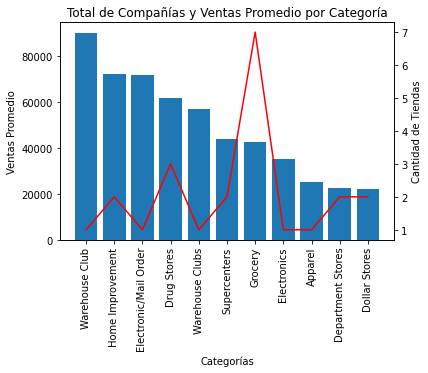

In [ ]:
fig, ax1 = plt.subplots()

ax1.bar(result_no_wallmart["Category"], result_no_wallmart["Average Sales"])
ax1.set_xlabel("Categorías")
ax1.set_ylabel("Ventas Promedio")
ax1.set_xticklabels(result_no_wallmart["Category"],rotation=90)

ax2 = ax1.twinx() 
ax2.set_ylabel("Cantidad de Tiendas")
ax2.plot(result_no_wallmart["Category"], result_no_wallmart["Count"], color="red")

plt.title('Total de Compañías y Ventas Promedio por Categoría')
plt.show()

In [ ]:
warehouse_company = df[df.Category == 'Warehouse Club']
warehouse_company["Company"]

2    Costco
Name: Company, dtype: object

Podemos observar como al analizar las categorías por la cantidad de compañías que tienen y sus ventas promedio, la categoría que resalta es **Warehouse Club**, donde la compañía **Costco** es la que ha generado todas las ventas de esta categoría, siendo también la compañía con mejores ventas promedio por tienda.

### Conclusiones

Podemos concluir que **Wallmart US** tienen un dominio de mercado muy marcado, por lo que no podemos enfocarnos que competir contra esta compañía como primer paso.

#### Ventas
Sobre las ventas, aunque el promedio de ventas esté arriba de **46,000 millones de dolares**, la mayor cantidad de compañías no pasan de **30,000 millones de dolares**.

Tampoco se ve una relación directa entre la cantidad de tiendas y las ventas de las Compañías

#### Tiendas
Las compañías con mejores ventas promedio por tienda son **Costco, Wallmart US y Sam`s Club**

Adicionalmente se nota que las compañías con más tiendas **NO** tienen las mayores ventas, y se pudo comprobar que **NO** existe una relación entre la cantiddad de tiendas y las ventas promedio por tienda.

#### Compañías Dominantes
Podemos notar que las compañías importantes del sector son **Costco (Mejores ventas promedio por tienda), Kroger (Compañía número uno en la categoría de Grocery), Wallgreens Boots (Número uno en la categoría de Drug Stores)**, sin considerar a Wallmart US

#### Categorías
Considerar que las principales categorías en ventas totales son **Grocery, Drug Stores y Home Improvement**, esto si no consideramos a Wallmart US en el análisis.

Y que las principales categorías en ventas promedio por tiendas son **Warehause Club, Home Improvement y Electronic/Mail Order**, tampoco consideramos a Wallmart US en este segmento

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=300d8081-1dde-4a49-9db6-8e7bb8605fb4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>